

This is a classification task that consists of correctly classifying a variable 'Y' with respect to 23 other variables 'X1-X23'. Classification tasks can be defined as the task of learning a target function F that maps each attribute set X to one of the predefined class labels Y. Y is denoted as a credit default of either 1 or 0, or in other words yes or no, making it a classification task. The objective is to predict this variable using the 23 attributes. Since this a paired assignment, 6 data mining algorithms will be employed on the relevant credit dataset provided which has already been split into a train set and test set. The best model out of the 6 will be selected to finally evaluate on the test set, which is unseen data and provides a realistic benchmark of the models' performance relative to new data given to us. 

To achieve this outcome, we'll be following the universal workflow of machine learning, which typically consists of the following:

- Loading in the necessary data followed by data inspection and data visualisation to gain insight on the data we are dealing with.
- Splitting the data into a train/test set. In this case, the data has already been split into two csv files of train and test sets. 
- Data preparation ~ If necessary.
- Model building and evaluation using cross validation and different parameters.
- Fine tuning: Performing Grid Search to find the most optimal parameters for the test set to utilise.
- Finally, evaluate the best model on the test set (unseen data).

<h3>Imporing necessary libraries</h3>

In [1]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split

# Common imports
import os
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#from sklearn.linear_model
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [2]:
# Load dataframes from CSV files
train_df = pd.read_csv('creditdefault_train.csv')
test_df = pd.read_csv('creditdefault_test.csv')

<h2>Data inspection</h2>

Like any data mining task, the first step is to inspect the data to have a greater understanding of what we are dealing with before preprocessing it. We start off by using the head() function on both the train and test set, which shows a dataframe of the first 5 rows. As expected, Y values are either 1 for yes or 0 for no, whereas the other 23 variables are attributes to used to predict the outcome. 

In [5]:
train_df.head()

Y      X1  X2  X3  X4  X5  X6  X7  X8  X9  ...     X14     X15     X16  \
0  1   20000   2   2   1  24   2   2  -1  -1  ...     689       0       0   
1  0   50000   2   2   1  37   0   0   0   0  ...   49291   28314   28959   
2  0   50000   1   2   1  57  -1   0  -1   0  ...   35835   20940   19146   
3  0   50000   1   1   2  37   0   0   0   0  ...   57608   19394   19619   
4  0  500000   1   1   2  29   0   0   0   0  ...  445007  542653  483003   

      X17    X18    X19    X20    X21    X22    X23  
0       0      0    689      0      0      0      0  
1   29547   2000   2019   1200   1100   1069   1000  
2   19131   2000  36681  10000   9000    689    679  
3   20024   2500   1815    657   1000   1000    800  
4  473944  55000  40000  38000  20239  13750  13770  

[5 rows x 24 columns]

In [6]:
test_df.head()

Y      X1  X2  X3  X4  X5  X6  X7  X8  X9  ...    X14    X15    X16    X17  \
0  1  120000   2   2   2  26  -1   2   0   0  ...   2682   3272   3455   3261   
1  0   90000   2   2   2  34   0   0   0   0  ...  13559  14331  14948  15549   
2  0  140000   2   3   1  28   0   0   2   0  ...  12108  12211  11793   3719   
3  0   20000   1   3   2  35  -2  -2  -2  -2  ...      0      0  13007  13912   
4  0  200000   2   3   2  34   0   0   2   0  ...   5535   2513   1828   3731   

    X18   X19   X20    X21   X22   X23  
0     0  1000  1000   1000     0  2000  
1  1518  1500  1000   1000  1000  5000  
2  3329     0   432   1000  1000  1000  
3     0     0     0  13007  1122     0  
4  2306    12    50    300  3738    66  

[5 rows x 24 columns]

**Training Dataframe Information**

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       15000 non-null  int64
 1   X1      15000 non-null  int64
 2   X2      15000 non-null  int64
 3   X3      15000 non-null  int64
 4   X4      15000 non-null  int64
 5   X5      15000 non-null  int64
 6   X6      15000 non-null  int64
 7   X7      15000 non-null  int64
 8   X8      15000 non-null  int64
 9   X9      15000 non-null  int64
 10  X10     15000 non-null  int64
 11  X11     15000 non-null  int64
 12  X12     15000 non-null  int64
 13  X13     15000 non-null  int64
 14  X14     15000 non-null  int64
 15  X15     15000 non-null  int64
 16  X16     15000 non-null  int64
 17  X17     15000 non-null  int64
 18  X18     15000 non-null  int64
 19  X19     15000 non-null  int64
 20  X20     15000 non-null  int64
 21  X21     15000 non-null  int64
 22  X22     15000 non-null  int64
 23  X23     150

<h4>Data Info</h4> 

By inspecting the data, we can see that all variables are of type int, which means we won't need to perform one hot encoding, which is used to transform categorical or object types into a suitable format for the algorithms to use. 

**Training Dataframe Described**

In [7]:
train_df.describe()

Y             X1            X2            X3            X4  \
count  15000.000000   15000.000000  15000.000000  15000.000000  15000.000000   
mean       0.221200  167450.245333      1.604867      1.850000      1.556200   
std        0.415069  130109.925023      0.488896      0.786686      0.522743   
min        0.000000   10000.000000      1.000000      0.000000      0.000000   
25%        0.000000   50000.000000      1.000000      1.000000      1.000000   
50%        0.000000  140000.000000      2.000000      2.000000      2.000000   
75%        0.000000  240000.000000      2.000000      2.000000      2.000000   
max        1.000000  800000.000000      2.000000      6.000000      3.000000   

                 X5            X6            X7            X8            X9  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean      35.367933     -0.020467     -0.130933     -0.163000     -0.214467   
std        9.154118      1.125048      1.198451      1.202606      1.180578   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       75.000000      8.000000      8.000000      8.000000      8.000000   

       ...            X14            X15            X16            X17  \
count  ...   15000.000000   15000.000000   15000.000000   15000.000000   
mean   ...   47117.562067   43077.445667   40272.922667   38708.685867   
std    ...   69182.434940   64016.907786   60503.339354   59212.425410   
min    ...  -34041.000000 -170000.000000  -46627.000000 -339603.000000   
25%    ...    2733.500000    2392.750000    1800.000000    1200.000000   
50%    ...   20165.000000   19090.500000   18178.000000   17177.000000   
75%    ...   60263.250000   54599.500000   50134.750000   49122.750000   
max    ...  855086.000000  706864.000000  587067.000000  568638.000000   

                 X18           X19            X20            X21  \
count   15000.000000  1.500000e+04   15000.000000   15000.000000   
mean     5615.960000  5.822059e+03    4942.959000    4997.328867   
std     15551.708028  2.155675e+04   13629.034736   16499.349511   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%      1000.000000  8.330000e+02     390.000000     290.000000   
50%      2113.000000  2.014000e+03    1809.000000    1500.000000   
75%      5023.250000  5.000000e+03    4571.500000    4048.500000   
max    493358.000000  1.227082e+06  380478.000000  528897.000000   

                 X22            X23  
count   15000.000000   15000.000000  
mean     4798.478400    5226.421267  
std     15463.948485   18099.851948  
min         0.000000       0.000000  
25%       204.000000      80.000000  
50%      1500.000000    1500.000000  
75%      4019.500000    4000.000000  
max    426529.000000  528666.000000  

[8 rows x 24 columns]

<h4>Data description</h4>

This function is useful since it provides a summary of the statistical properties or characteristics of the dataset, which is particularly easy to read. It serves as a tool to identify whether there are any missing values in the dataset or any outliers that must be dealt with before continuing with the task.

In [8]:
train_df.isnull().sum().sum() #Checking if the training set dataframe has any empty values (NaN)

0

In [9]:
test_df.isnull().sum().sum() #Checking if the test set dataframe has any empty values (NaN)

0

<h4>Checking for any NaN values in the dataset</h4>

This function is used to check for any missing values in both the training and test set, which would be problematic for model building had there been any. Typically, we could implement a simple imputer to fill any missing values with the mean or median, so that the classification models have more data to work with, whereby a lack of data can often lead to overfitting. 

<h2>Data visualisation</h2> 

In addition to data inspection, we can always plot the data to visualise and gain insights. Data visualisation is critical for recognising any underlying patterns and extracting useful insights, which is especially true when dealing with complex, multivariate data. To start off, we will build a correlation heatmap to represent the correlations between different variables.

<h3>Heatmap</h3>

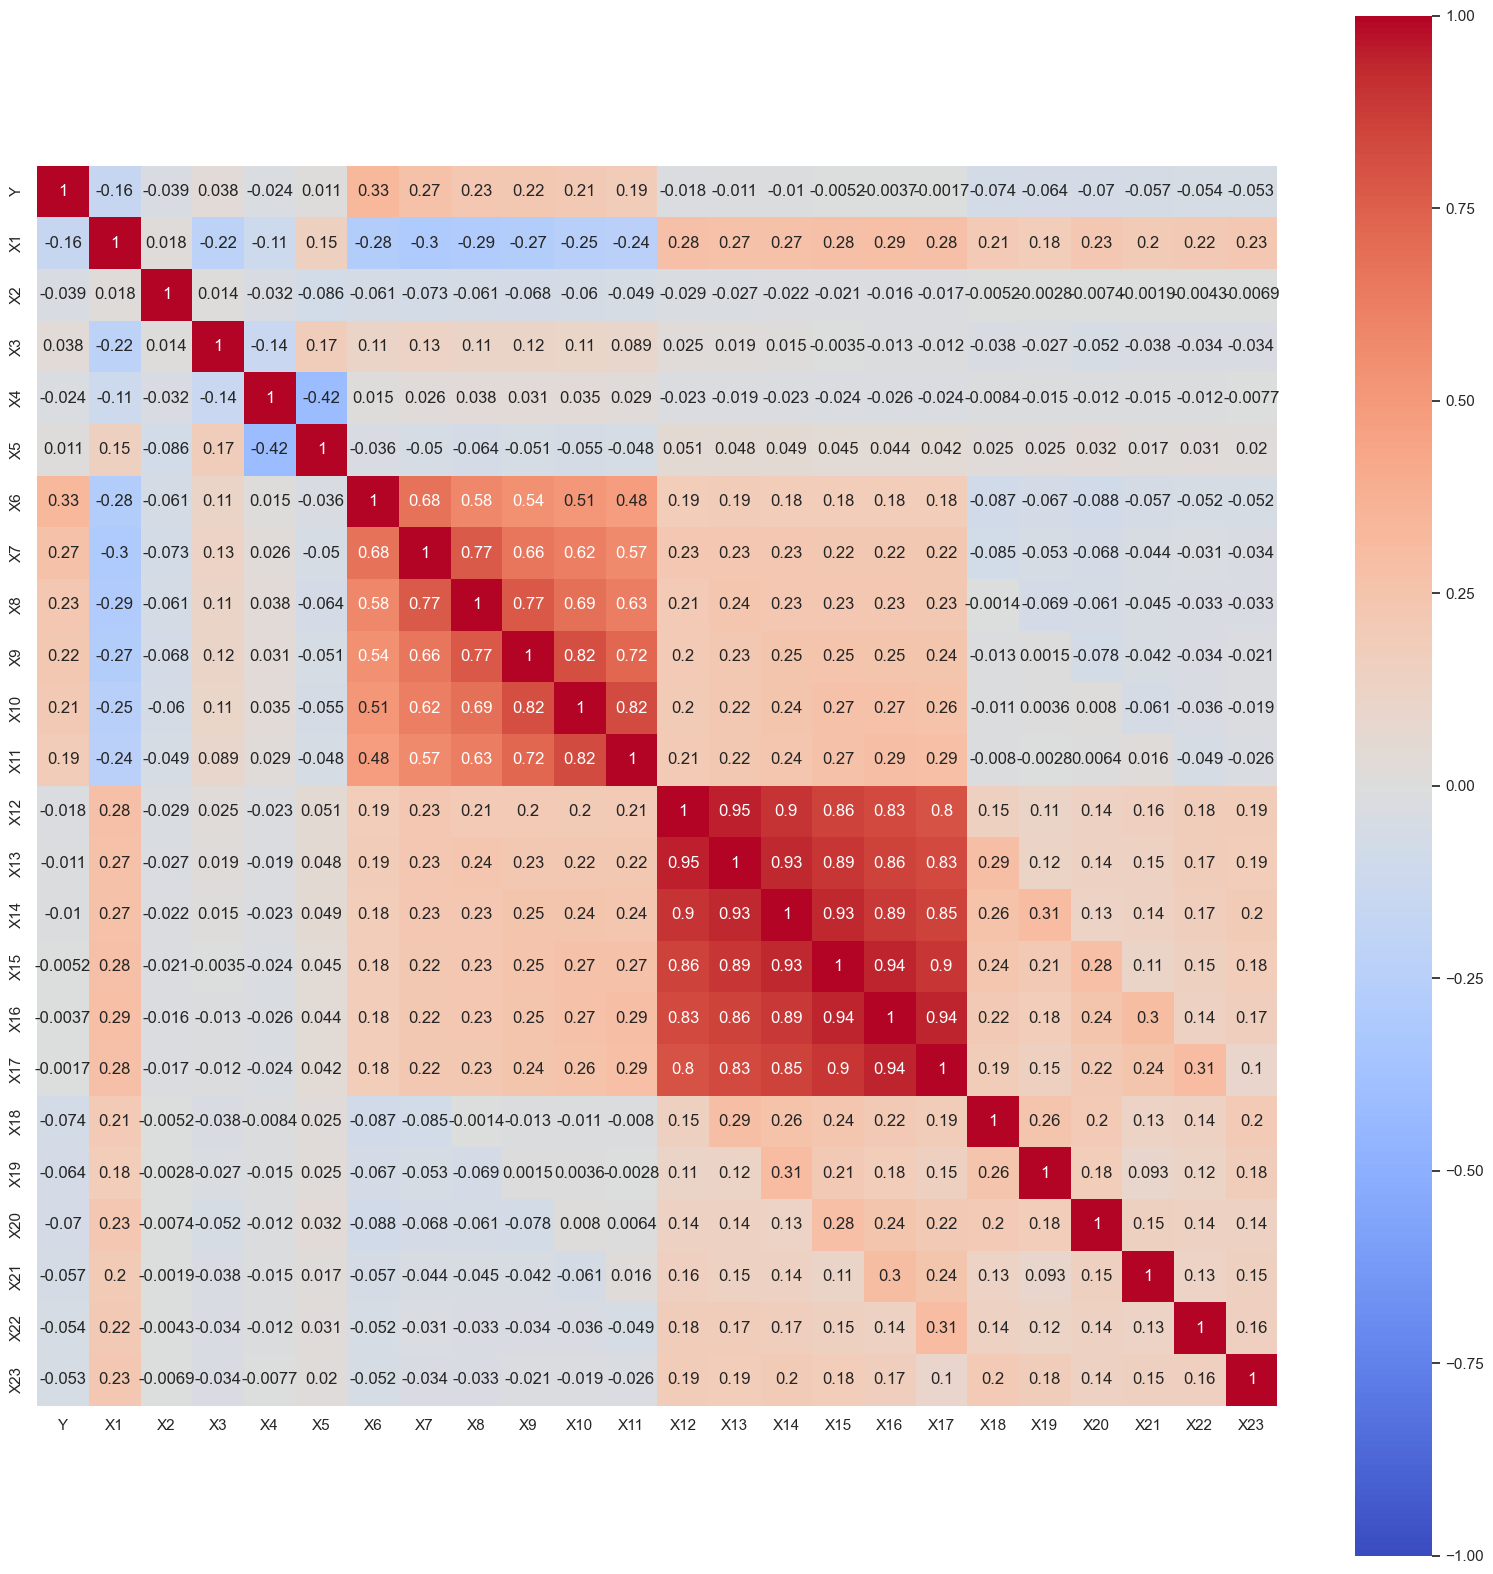

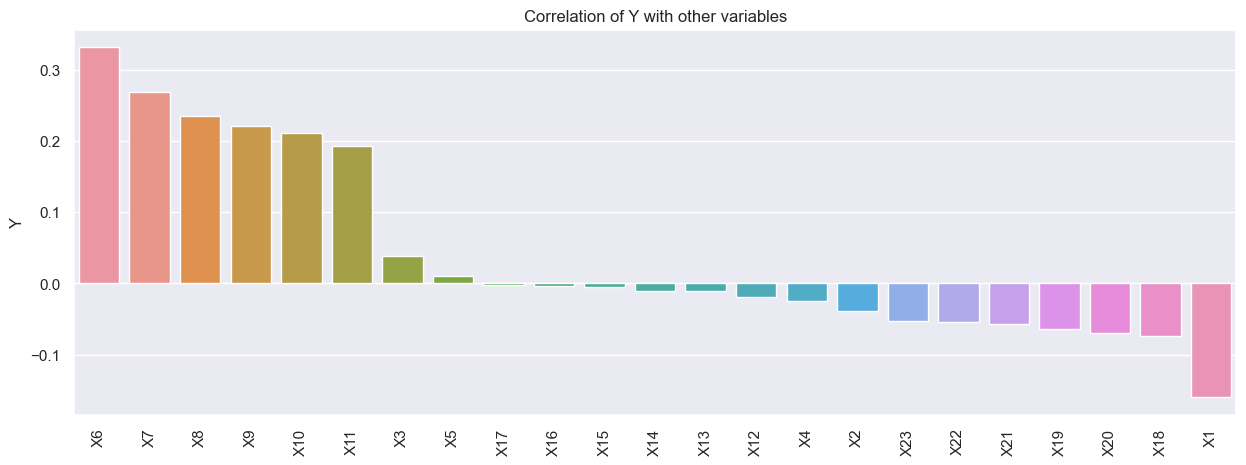

In [10]:
sns.set(rc={'figure.figsize':(20,20)})
train_df_corr = train_df.corr()
sns.heatmap(train_df_corr, annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm', square=True)

# Plot the correlation of Y with other variables
corr_with_Y = train_df_corr.loc['Y']
corr_with_Y = corr_with_Y.drop('Y') # Drop correlation with itself
corr_with_Y = corr_with_Y.sort_values(ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x=corr_with_Y.index, y=corr_with_Y)
plt.xticks(rotation=90)
plt.title('Correlation of Y with other variables')
plt.show()

<h4>Results</h4>

The correlaiton heatmap is ideal for showing patterns and relationships between variables in the data. We can see how variables are correlated to Y when Y = 1. To reinforce this, a barplot can be seen beneath the heatmap, which shows the same correlations but in a different format. These two data visualisation methods provide as a useful tool for insight, especially when dealing with a dataset as large as this one. In particular, the heatmap shows that there are a cluster of similar values in the middle of the heatmap, specifically at X12 - X17, These are the values which are closest to Y=1. 


<h3>Plotting a FacetGrid</h3>

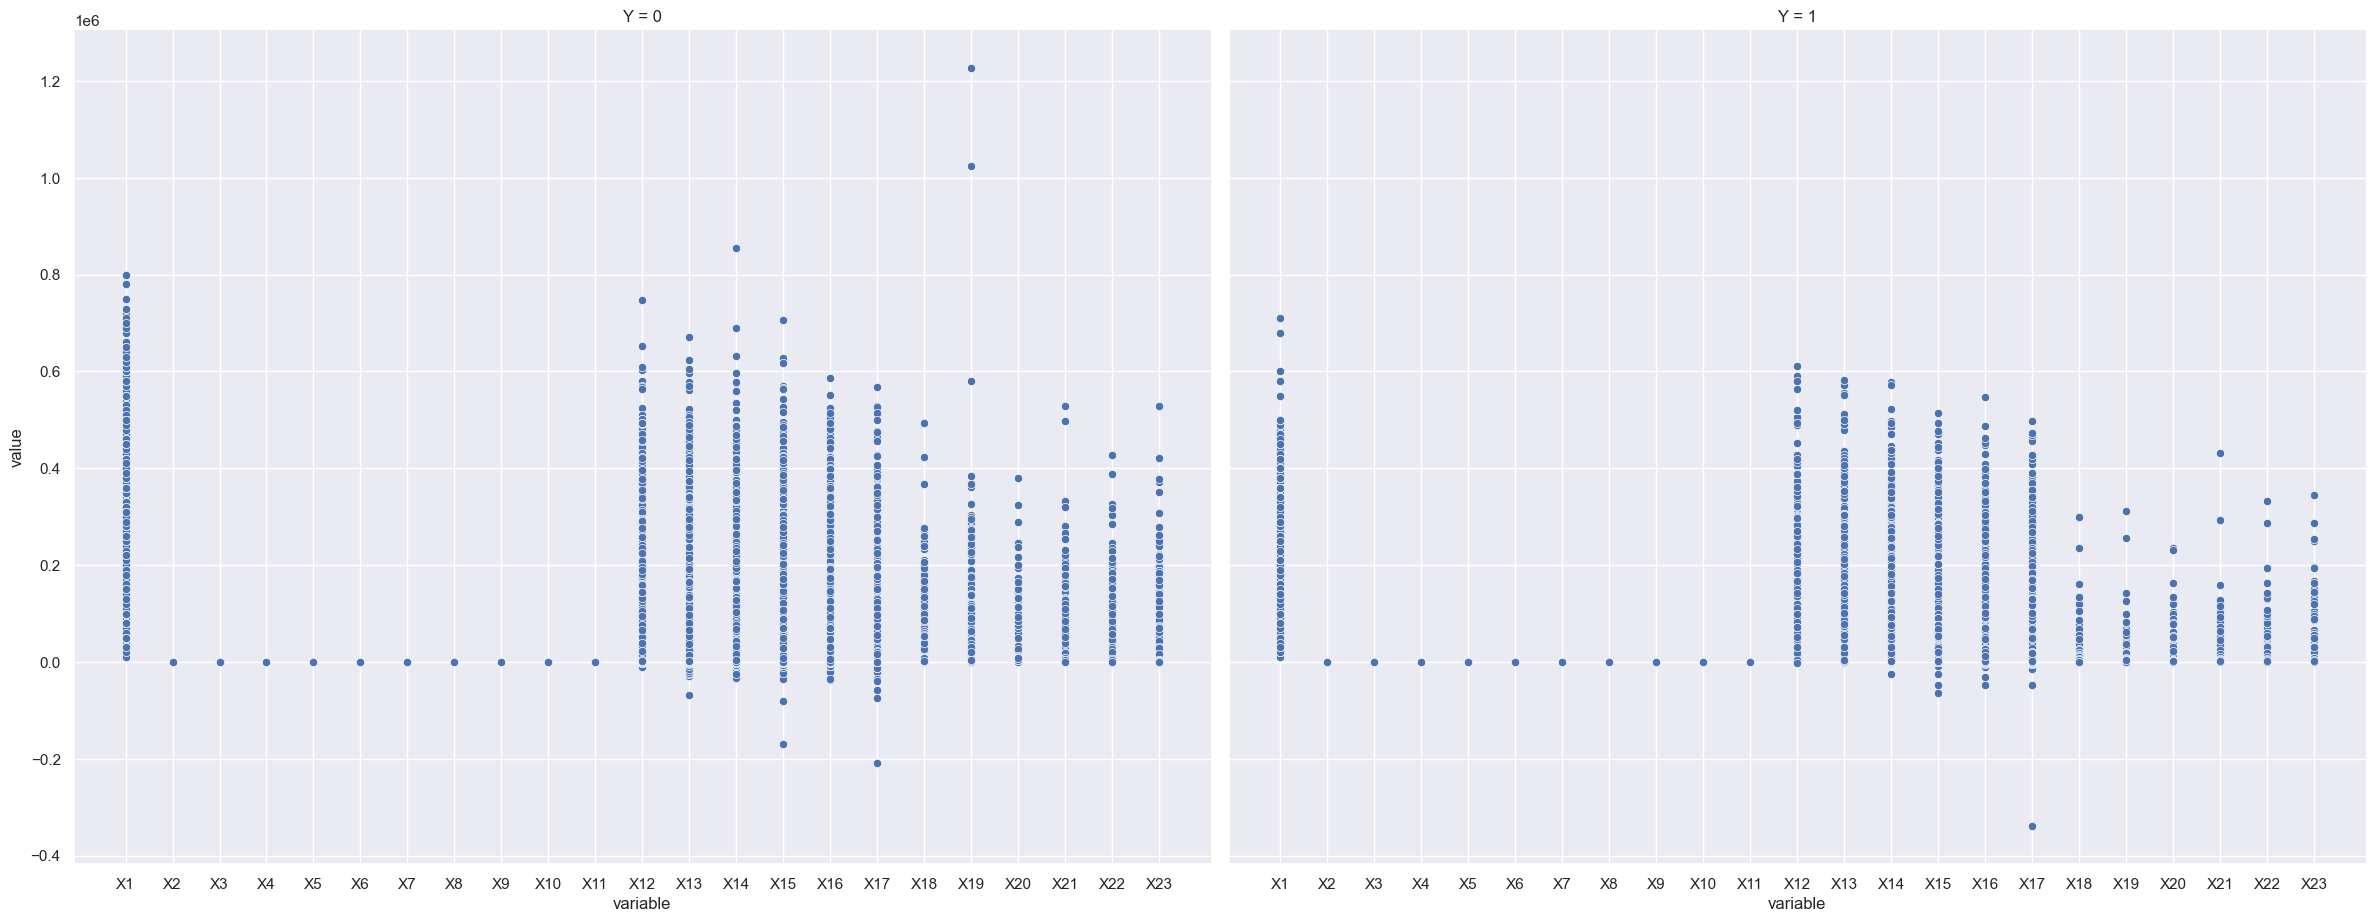

In [11]:
trainDF_long = pd.melt(train_df, id_vars=["Y"], var_name="variable", value_name="value")

g = sns.FacetGrid(trainDF_long, col="Y", aspect=4)
g.map(sns.scatterplot, "variable", "value")

g.fig.subplots_adjust(top=3)

<h4>Results</h4>

FacetGrids are another data visualisation tool to map multiple plots that are grouped according to the specified variable. The Facet Grid above demonstrates that when Y=1 in the training dataframe, the rest of the dataframe is more likely to have less outliers. Visually, we are able to see that when Y=0, there are major outliers such as, X19, having values be a lot higher than usual will most probably mean that Y=0.

<h3>A Pairplot using 100 samples from each column<h3>

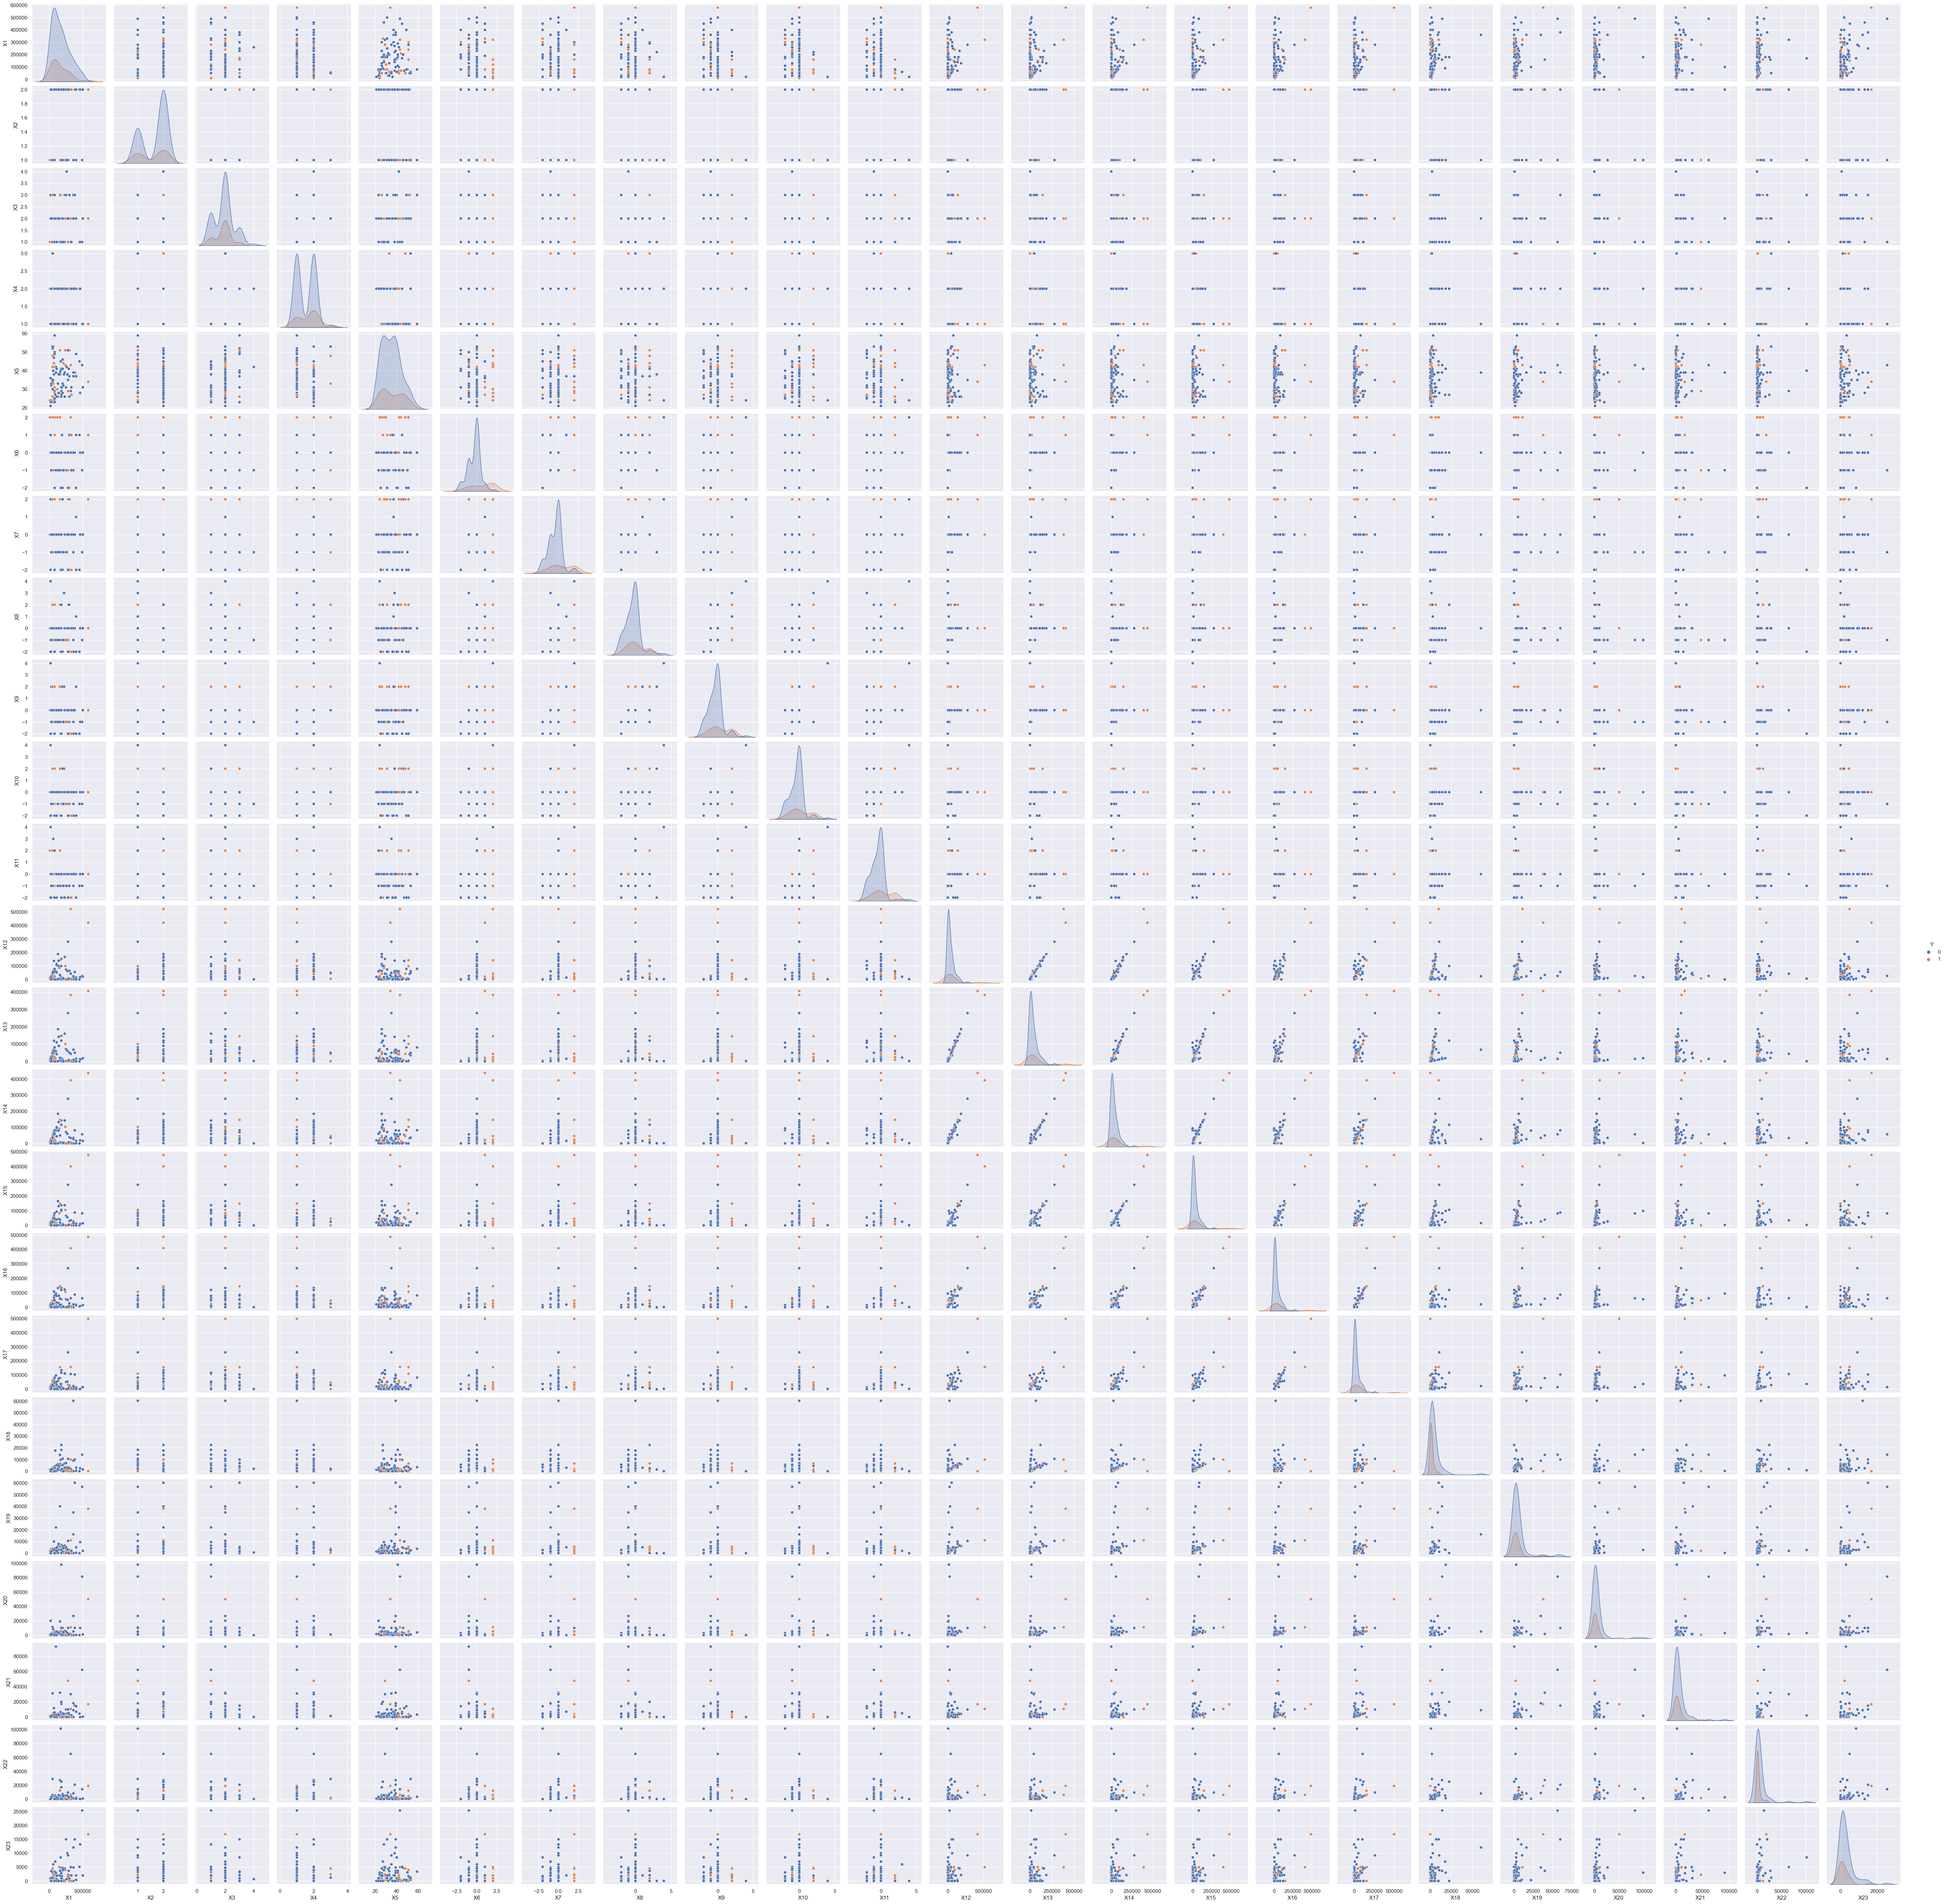

In [12]:
sns.pairplot(train_df.sample(100), hue="Y")

<h4>Results</h4>

This is yet another useful visualisation tool to explore relationships and patterns in the data. Since the data is multivariate, that is, data that involves more than two independent variables that produce a single outcome, it enables multivariate analysis, allowing us to identify correlations in the data, similar to the correlation heatmap. This pairplot takes 100 samples from each column and maps it onto 23x23 grid for each respective variable.

<h2>Data preparation</h2>

The next step in the task is to prepare the data accordingly, so that it's suitable for each model to use. The data first needs to be split into train and test sets, which has already been done, making the process easier. We also need to split the features and target variables into seperate sets, which will be called X_train/test, and y_train,test. This is needed so that the models can make predictions and be compared with the actual values (y_train/test).

Models will be built using the train set and then finally we will employ the test set on the most suitable model. 

In [3]:
# Split data into X and y (features and target)
X_train = train_df.drop('Y', axis=1) 
y_train = train_df['Y']

X_test = test_df.drop('Y', axis=1)
y_test = test_df['Y']

# Split the data into training and test sets
test_size = 0.2 # proportion of the data to use for testing
random_state = 42 # set a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state)

<h2>Model building</h2>

The data has been prepared in a sufficient manner, and so the next step is to move onto building the models using the train set. Each model will start off with some predefined variables, followed by an alternate version of that same model with some parameters changed to yield a different result. Each model will also use cross validation, which is a common method in the field of machine learning which works by randomly splitting the training data into subsets called 'folds'. In this case, we will use 5 folds of cross validation throughout the model building process. This can be observed via the 'cv' parameter.

Since this is a classification task, we'll use accuracy as the main evaluation metric to judge how well each model has performed, and since we're using cross validation, we take the accuracy for 5 folds and then use that to formulate the mean. 

The penultimate step in the model building process will consist of some fine-tuning in the form of GridSearch. GridSearch makes the model building process much more stream-lined by selecting the best combination of optimal hyperparameters for any given model. Instead of manually tuning hyperparameters to yield the best results, which is extremely tedious, this technique automates this process, allowing for greater efficiency.

Finally, we will plot each model on graph to show the accuracy with respect to some hyperparameter, relative to each model.


Results in training can widely vary depending on if the model has underfit or overfit on the training data. This can be for a number of reasons, but the main reason in most data mining tasks is due to noise in the data.

<h3>K-Nearest Neighbour</h3>

We will start off by building the most common algorithm in the field of machine learning and data mining, which is the Nearest Neighbour algorithm. The algorithm is part of a technique called instance-based learning, which works by comparing new instances of data with pre-existing instances of data in training. This is relative to the nearest neighbour algorithm, which operates by comparing a given test instance z to the number of k points closest to z. This value depends on the number of neighbours specified in the algorithm; for instance, in the case of k = 5 (where k = number of neighbours), it will identify the 5 closest neighbours to the specified point z and then makes a classification based on a majority rule or class.

Another important factor of the nearest neighbour algorithm is the distance. When designing this algorithm, the first step is to define the distance measure. Common distance measures include the Euclidean distance, Manhattan distance or Minkowski distance. The algorithm implemented by SciKit learn has a default power p of 2, which is the Euclidean distance. We will use this distance throughout training for the purpose of consistency.

An important note is that, in some cases this classifier is subject to overfitting due to factors such as k being too small on noisy training data. If k is too large, it can misclassify the test instance since it incorporates data points located far away from its neighbourhood. 

For this reason, we start out by using the default parameter of n_neighbours = 5, which can be changed after the intial test with manual tuning and fine-tuning of hyperparameters using GridSearch.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(knn, X_train,  y_train, scoring='accuracy', cv=5)
print('accuracy for 5 folds: ', scores)
print('mean: ', np.mean(scores))

accuracy for 5 folds:  [0.74333333 0.75041667 0.75041667 0.75541667 0.74666667]
mean:  0.74925


We first use the get_params() function to gain insight on the KNN algorithm and understand what parameters are utilised. 

In [15]:
params = knn.get_params() #Fetching parameters for KNN so that we know what to utilise for grid search and model tuning
print(params)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [16]:
knn.n_neighbors = 1 #Trying with 1 neighbour instead of 5
scores=cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=5)
print('accuracy for 5 folds: ', scores)
print('mean: ', np.mean(scores))

accuracy for 5 folds:  [0.69375    0.68916667 0.68125    0.68208333 0.6825    ]
mean:  0.68575


In [17]:
knn.n_neighbors = 5 
knn.leaf_size = 1000 # Experimenting with a larger leaf size
scores=cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=5)
print('accuracy for 5 folds: ', scores)
print('mean: ', np.mean(scores))

accuracy for 5 folds:  [0.74333333 0.75041667 0.75041667 0.75541667 0.74666667]
mean:  0.74925


<h4>Results</h4>

As expected, the model performs considerably worse when the number of neighbours (k) is too small, since it overfits on noisy training data. The default parameter n_neighbour of 5 produced the best results using cross validation. The next step will be to find the most optimal hyperparameter tuning using GridSearch. 

The 3rd test experiments with a larger leaf size of 1000, compared to the default value of 30. This test had the same outcome as the first test which utilised the same number of neighbours. In hindsight, this parameter is subjective since it depends on the nature of the problem, and usually only affects the speed of model construction. For this reason, we won't be using this as a parameter in the fine tuning process. 

The next step is GridSearch to automate the hyperparameter tuning process.

In [18]:
param_grid = [
     {'n_neighbors': [1, 3, 5, 7, 9]} ] #Specifying hyperparameters using a param_grid

grid_search = GridSearchCV(knn, param_grid, cv=5, #SKLearn function for GridSearch, specifying the model and using the same parameters of CV and scoring
                           scoring='accuracy',
                           return_train_score=True,
                            n_jobs=-1)  #Runs in parallel to number of jobs

grid_search.fit(X_train, y_train) #Fit grid search to features and labels
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

# display performance result for each set of hyperparameters specified 
cvres = grid_search.cv_results_              #Dictionary containing performance metrics
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)

best parameter values {'n_neighbors': 9}
best estimator KNeighborsClassifier(leaf_size=1000, n_neighbors=9)
0.68575 {'n_neighbors': 1}
0.7286666666666666 {'n_neighbors': 3}
0.74925 {'n_neighbors': 5}
0.7574166666666666 {'n_neighbors': 7}
0.7612500000000001 {'n_neighbors': 9}


<h3>Plotting results on a graph</h3>

Like that of data visualisation, plotting data on a graph is far more visually appealing as opposed to observing a plethora of performance metrics via the code above. Data plots for training results are also more useful for observing whether a model has overfit or underfit on the training data.


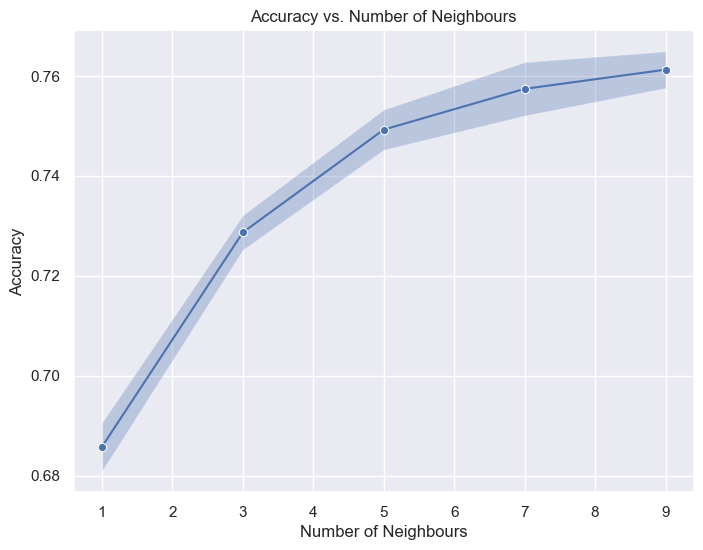

In [19]:
x = [1, 3, 5, 7, 9]

mean_scores = cvres["mean_test_score"]
std_scores = cvres["std_test_score"]

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=x, y=mean_scores, marker='o', ax=ax)
ax.fill_between(x, mean_scores - std_scores, mean_scores + std_scores, alpha=0.3)
ax.set_xlabel('Number of Neighbours')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs. Number of Neighbours')

plt.show()

<h4>Results</h4>

Representative of the tests above, the accuracy is significantly worse when k is too small. It's evident that the accuracy increases when k increases, however after a few iterations it starts to plateau meaning more neighbours would likely result in underfitting. In short, this model is far too simple and will not see important patterns in the data and won't generalise well on the unseen data.

<h3>Decision Tree</h3>

The next model we will be building is a decision tree classifier. This algorithm is a nonparametric approach in the contest of classification models, meaning it usually doesn't require prior assumptions in regard to probabiility distributions in a given dataset. Decision trees consist of three types of nodes:
- The root node
- Internal nodes
- Leaf/terminal nodes

Leaf nodes are assigned class labels while the former nodes contain attribute test conditions to separate data attributes depending on their respective characteristics. The algorithm starts at the root node, and depending on the result of the test condition (either yes or no), it follows the respective branch depending on the result of the test condition. This leads to an internal node which will repeat this step, or stop at a leaf node, which has no further nodes (children). These steps are repeated recursively until the stopping criterion is met, or when the tree reaches its maximum depth, and the class labels associated with the relevant leaf node is assigned to the record. 

This model is far more complex relative to KNN, meaning it is less likely to underfit on the training data. The model is also computationally inexpensive to construct and is less susceptible to overfitting due to the presence of noise in data. The presence of redundant data also will not adversely affect the accuracy of decision trees, which is highly likely in this case since there are so many attribute variables of similarity. Furthermore, once the model has been built, testing on unseen data is fast, with a worst-case time complexity of O(w) (w = max_depth).

The intitial model has a default parameter value of 'none' for max_depth, but we will implement an alternate version of the same model while changing the value after. 

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt = tree.DecisionTreeClassifier()
scores=cross_val_score(dt, X_train,  y_train, scoring='accuracy', cv=5)
print('accuracy for 5 folds: ', scores)
print('mean: ', np.mean(scores))

accuracy for 5 folds:  [0.72916667 0.74083333 0.71125    0.70833333 0.71958333]
mean:  0.7218333333333333


In [21]:
dt.max_depth=3 #Testing using a max_depth of 3
scores=cross_val_score(dt, X_train, y_train, scoring='accuracy', cv=5)
print('accuracy for 5 folds: ', scores)
print('mean: ', np.mean(scores)) 

accuracy for 5 folds:  [0.81958333 0.81625    0.83083333 0.81708333 0.82083333]
mean:  0.8209166666666668


<h3>Results</h3>
    
The default max_depth of 'none' produces a worse outcome relatie to the second test using a max_depth of 3. This was expected since the algorithm relies on recursively scaling the tree, and a max depth of 0 will not allow for this. One downside to increasing max_depth is that it can lead to overfitting. However, there are methods that can be employed such as post-pruning, GridSearch and ensemble methods which we will see later in this report. 

In [22]:
param_grid = [
     {'max_depth': [2, 3, 4, 5, 6, 7, 8]} ]

grid_search = GridSearchCV(dt, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True,
                            n_jobs=-1) 

grid_search.fit(X_train, y_train)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)


cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)
    


best parameter values {'max_depth': 2}
best estimator DecisionTreeClassifier(max_depth=2)
0.8230833333333335 {'max_depth': 2}
0.8209166666666668 {'max_depth': 3}
0.8212499999999998 {'max_depth': 4}
0.8186666666666668 {'max_depth': 5}
0.818 {'max_depth': 6}
0.8150000000000001 {'max_depth': 7}
0.8123333333333334 {'max_depth': 8}


<h3>Plotting results</h3>

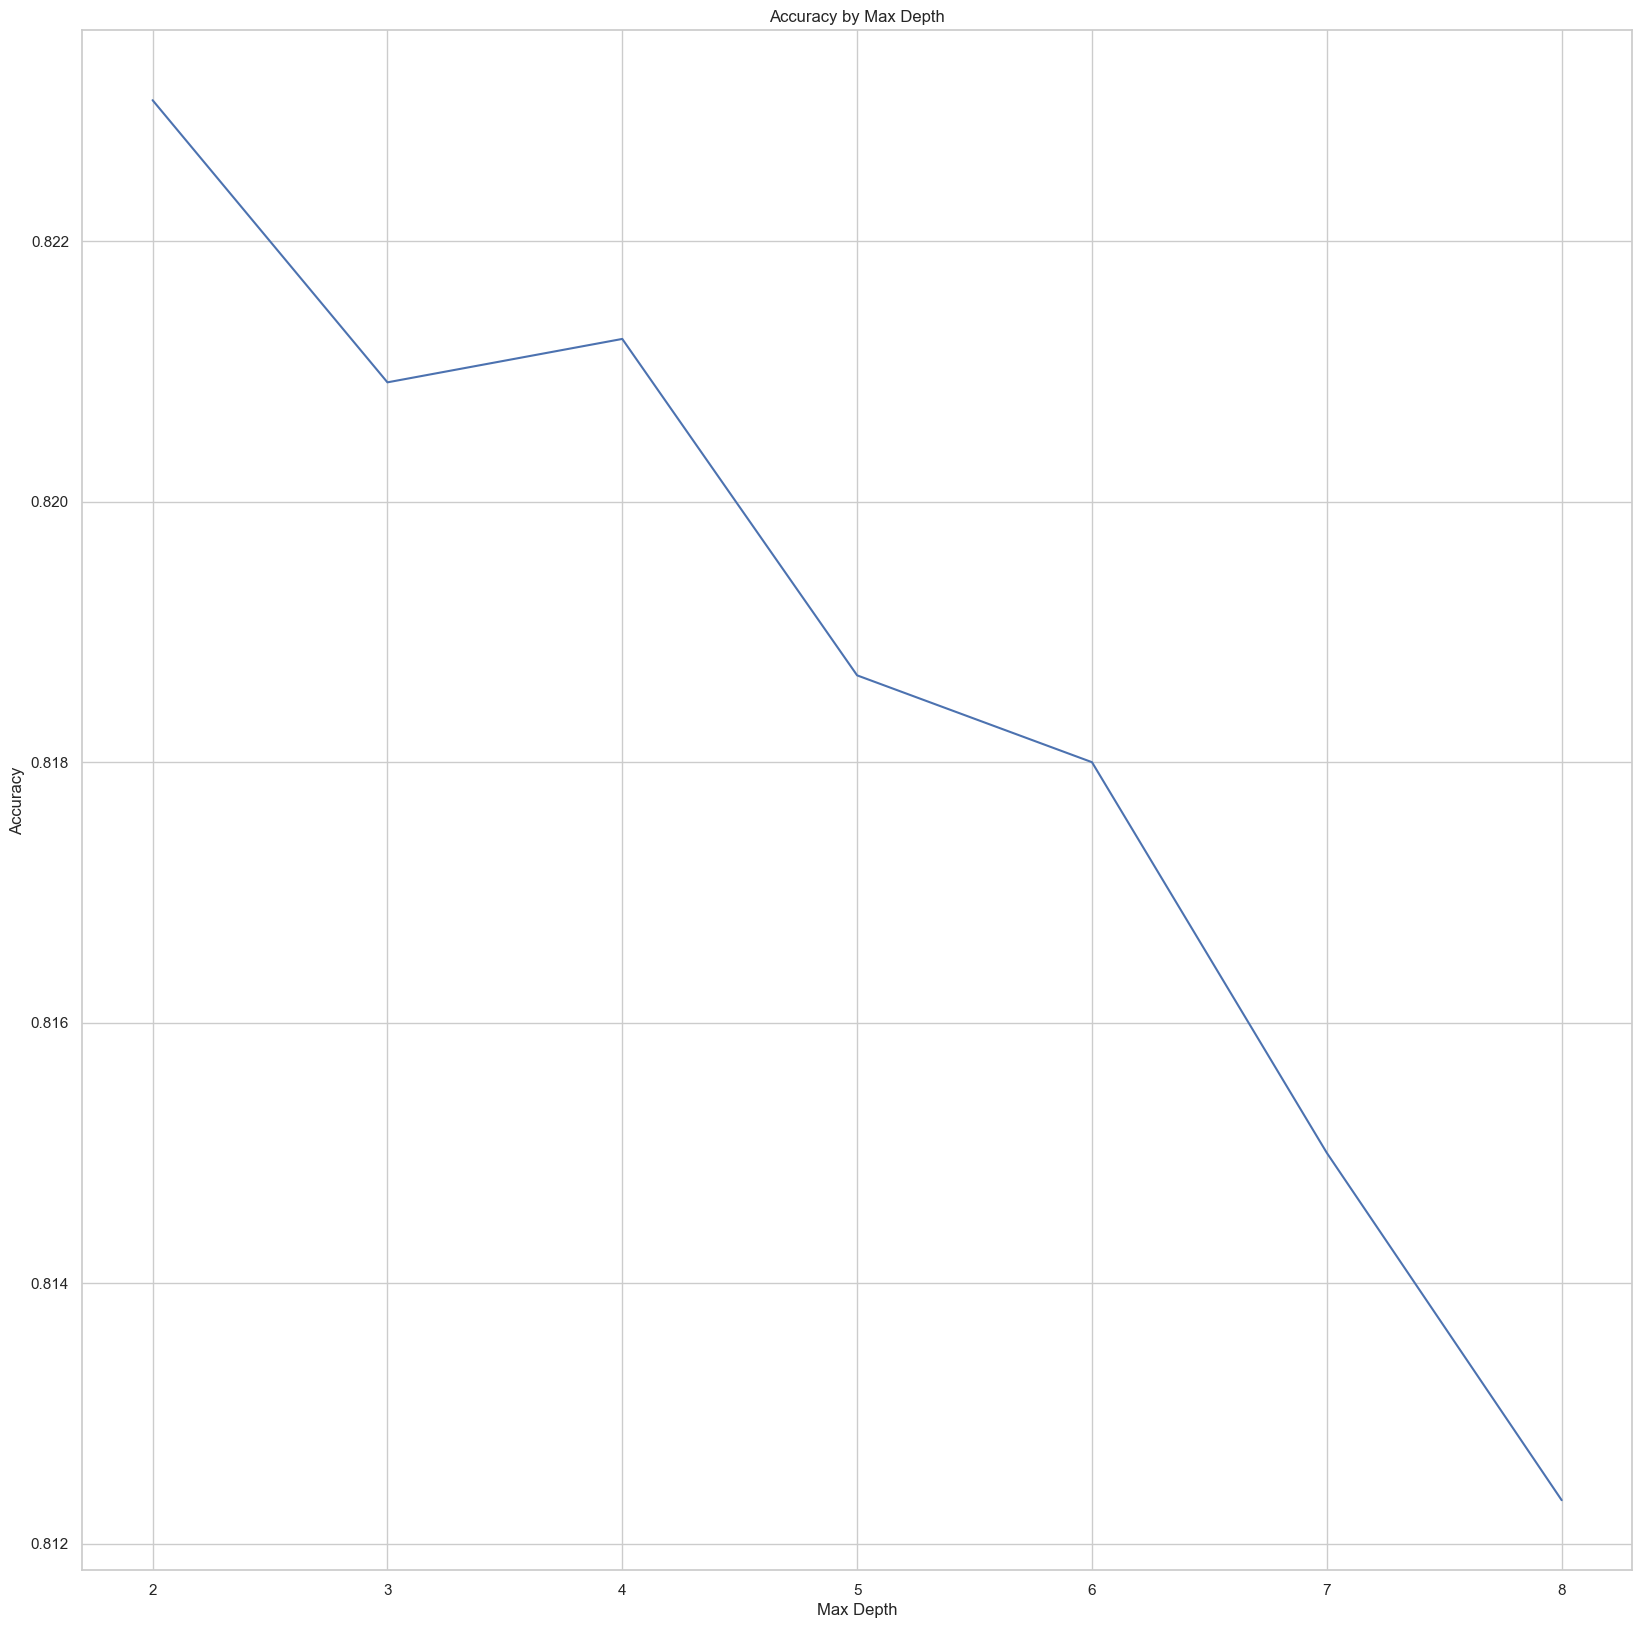

In [23]:
results_df = pd.DataFrame(cvres)
sns.set_style("whitegrid")
sns.lineplot(x='param_max_depth', y='mean_test_score', data=results_df)
plt.title('Accuracy by Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

<h4>Results</h4>

We can see that as max_depth increases beyond the optimal amount (4), it starts to underfit and the accuracy decreases with each increase in depth. This means that the model isn't complex enough, meaning it will not generalise well on unseen data. 

<h3>Ensemble based Algorithms - Bagging, Random Trees, Adaboost</h3>

The next series of algorithms are ensemble based algorithms, which is an elaboration of the aforementioned single classification algorithms. These models in particular work by aggregating the predictions of mltuple classifiers to improve classification accuracy, which tend to perform better than any single classification method such as nearest neighbours or decision trees. This methodology can be compared to that of the nearest neighbour algorithm, whereby classifications are justified on the basis of a majority rule. Instead of making a classification based on the justification using one model, we take an ensemble of individual models with a considerably higher error rate, and then minimise that error rate by taking a majority vote on the predictions made by those models. 

<h3>Bagging (Bootstrap aggregating)</h3>

Bagging is a technique that improves the generalization performance of models by reducing their variance. It does so by repeatedly sampling from a dataset with replacement to create multiple bootstrap samples of the same size as the original data. Each of these bootstrap samples is then used to train a separate base classifier, such as a decision stump.

After training k classifiers (number of classifiers), the final prediction for a test instance is obtained by combining the predictions of all the base classifiers. This is typically done by assigning the test instance to the class based on a majority vote for the base classifiers. For example, if two classes of plusses and circles are split by a decision boundary on a 2D plane, the bagged model will use the votes from multiple base classifiers to classify new data points.

Bagging improves the generalization error of base classifiers by reducing their variance. This is because the multiple bootstrap samples ensure that the base classifiers are trained on slightly different subsets of the original data, which reduces the impact of outliers and noise. However, the performance of bagging depends on the stability of the base classifiers, as unstable classifiers may be sensitive to small changes in the training data.

Overall, bagging is an effective technique for improving the generalization performance of  models, especially when applied to noisy data or unstable classifiers. By combining multiple base classifiers trained on slightly different subsets of the data, bagging can create a more accurate and robust model that is better able to handle complex data.

The first model utilises the default value of 10 estimators, which is then multiplied by 10 in the second test to see if their is a considerable difference. 

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bg=BaggingClassifier(DecisionTreeClassifier()) #Default = 10 estimators (trees)
scores=cross_val_score(bg, X_train,  y_train, scoring='accuracy', cv=5)
print('accuracy for 5 folds: ', scores)
print('mean: ', np.mean(scores))

accuracy for 5 folds:  [0.795      0.80416667 0.80666667 0.79708333 0.8075    ]
mean:  0.8020833333333334


In [6]:
bg.n_estimators=100 # by default 10 estimators (trees) are used
scores=cross_val_score(bg, X_train, y_train, scoring='accuracy', cv=5)
print('accuracy for 5 folds: ', scores)
print('mean: ', np.mean(scores))

accuracy for 5 folds:  [0.81416667 0.81708333 0.81833333 0.81208333 0.81416667]
mean:  0.8151666666666667


<h3>Results</h3>

It's evident that an increase in estimators increases the models accuracy when observing the two tests carried out using a default value of 10 estimators followed by 100. The results show that an increase in n_estimators changes the mean accuracy from 80.2% accuracy to 81.5% accuracy, suggesting that increasing this parameter directly increases performance. However, an important note, which can also be observed by previous models in this report, is that an increase in estimators does not explicitly suggest an increase in performance. Increasing the number of estimators can lead to a point of diminishing returns, whereby a direct increase no longer leads to any significant improvement. 

The next step will be to perform GridSearch using two hyperparameters: n_estimators and max_features. 

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
     'n_estimators': np.arange(100,1000,100), #Using the np.arange function to generate a numpy array with values starting at 100, scaling up to 900 with 100 step intervals.
     'max_features': [2, 3, 4, 6, 8, 10, 12, 14]
 }

grid_search = GridSearchCV(bg, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True,
                            n_jobs=-1)   
grid_search.fit(X_train, y_train)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)


best parameter values {'max_features': 14, 'n_estimators': 800}
best estimator BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=14,
                  n_estimators=800)
0.78325 {'max_features': 2, 'n_estimators': 100}
0.782 {'max_features': 2, 'n_estimators': 200}
0.7824166666666666 {'max_features': 2, 'n_estimators': 300}
0.78175 {'max_features': 2, 'n_estimators': 400}
0.7819999999999999 {'max_features': 2, 'n_estimators': 500}
0.7820833333333335 {'max_features': 2, 'n_estimators': 600}
0.782 {'max_features': 2, 'n_estimators': 700}
0.7824166666666666 {'max_features': 2, 'n_estimators': 800}
0.7819999999999999 {'max_features': 2, 'n_estimators': 900}
0.7882499999999999 {'max_features': 3, 'n_estimators': 100}
0.7898333333333334 {'max_features': 3, 'n_estimators': 200}
0.7891666666666668 {'max_features': 3, 'n_estimators': 300}
0.791 {'max_features': 3, 'n_estimators': 400}
0.7900833333333334 {'max_features': 3, 'n_estimators': 500}
0.7902499999999999 {'max_featu

In [12]:
grid_search.best_params_ #best parameters for the model to utilise

{'max_features': 14, 'n_estimators': 800}

<h3>Plotting results</h3>

<AxesSubplot: title={'center': 'Bagging Classifier Grid Search'}, xlabel='Max Features', ylabel='Accuracy'>

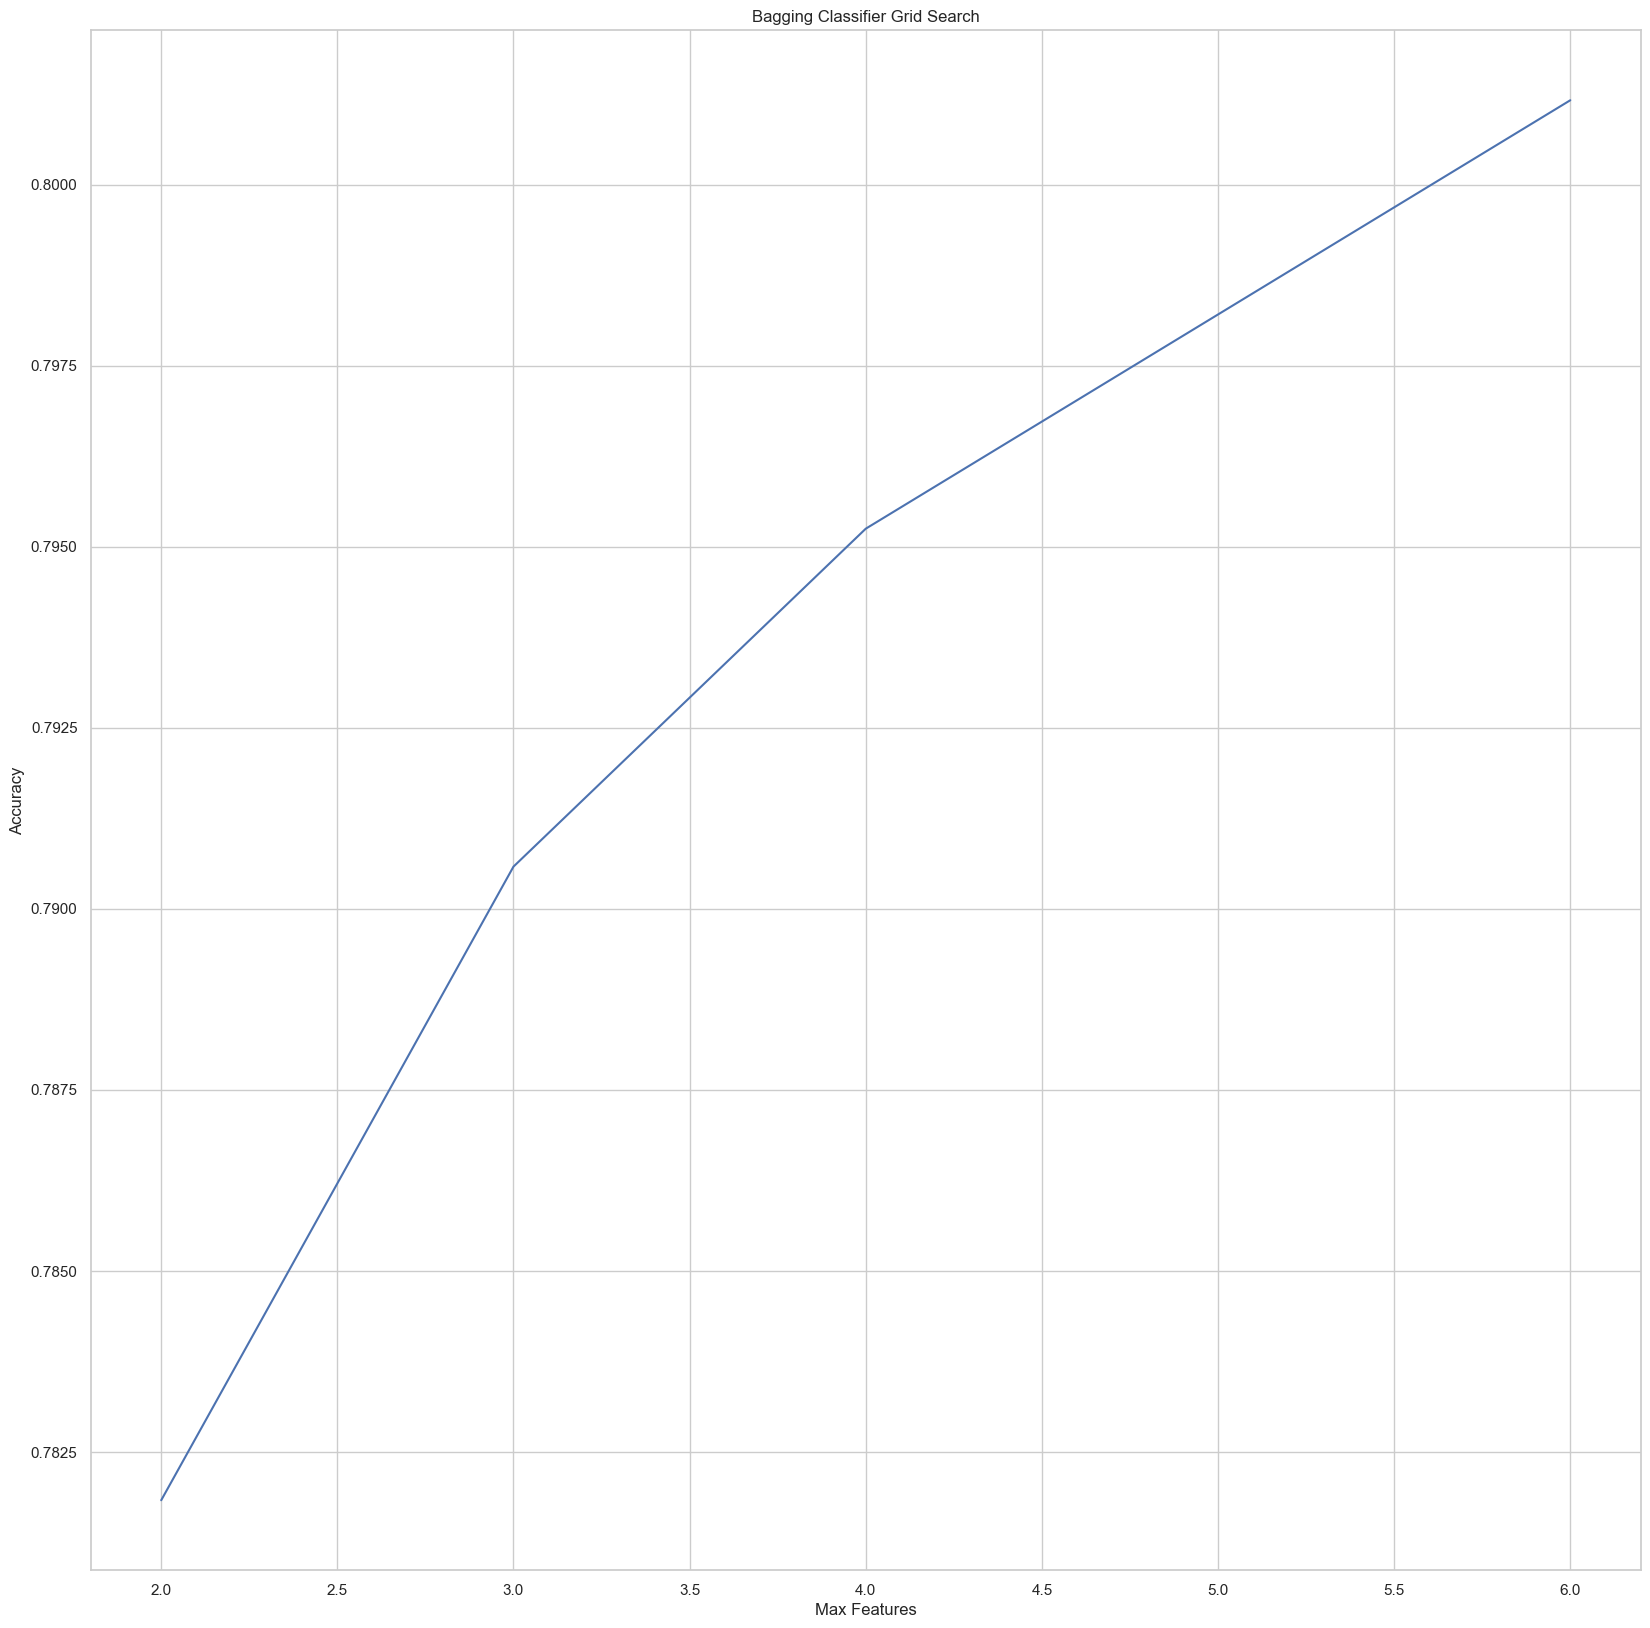

In [27]:
max_features_list = [2, 3, 4, 6]

mean_scores = []

for mf in max_features_list:
    mean_score = cvres['mean_test_score'][cvres['params'].index({'max_features': mf})]
    mean_scores.append(mean_score)

plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('Bagging Classifier Grid Search')
sns.lineplot(x=max_features_list, y=mean_scores)

<h4>Results</h4>

A quick note is that we attempted to plot n_estimators and max_features relative to the accuracy, but it would repeatedly crash the program despite troubleshooting and trying various methods such as reducing the range of hyperparameters for the model to use. We had to resort to only including max_features in the data plot which still provides some useful insight on the model's performance. The data plot was also only able to scale up to 6 max_features since we were encountering issues for anything beyound this amount. However, we can still see the model's relative performance by observing the GridSearch output and the best_params_ function: {'max_features': 14, 'n_estimators': 800}.

The model steadily increases in accuracy but the rate of increase tends to slow down after max_features = 3. We can see that in the GridSearch output, the accuracy steadily increases until around 10-12 max features. Since this is the case, this also tells us that increasing the max features parameter also increases the predictive power of the model, however if we inrease the parameter too much overfitting is highly likely to occur.
    

<h3>Ada Boost (Adaptive boosting) </h3>

The next algorithm is an alternate implementation of the boosting method called AdaBoost (adaptive boosting) which is yet another ensemble method used to tackle classification tasks. This is similar to the previous method, however instead of using a majority voting scheme to determine the classification target, the base classifiers C are trained on subsets on the data, and their weights are adjusted to improve the perforance of the next classifier by a paramater α. This paramaeter is larger if the error rate is close to 0 and a large negative value if it's closer to 1. The weight update mechanism can be seen by the following equation:

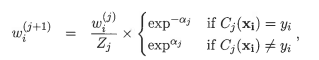

In [4]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier()
scores=cross_val_score(ab, X_train, y_train, scoring='accuracy', cv=5)
print('accuracy for 5 folds: ', scores)
print('mean: ', np.mean(scores))

accuracy for 5 folds:  [0.81875    0.81875    0.82708333 0.81625    0.82083333]
mean:  0.8203333333333334


In [5]:
ab.n_estimators=200
ab.learning_rate=0.5
scores=cross_val_score(ab, X_train, y_train, scoring='accuracy', cv=5)
print('acuracy on the 5 folds', scores)
print('and their mean', np.mean(scores))

acuracy on the 5 folds [0.81666667 0.81708333 0.8225     0.81708333 0.81666667]
and their mean 0.818


<h3>Results</h3>

This model has produced the highest accuracy thus far out of all the models trained on the data with a high of 82% in the initial test. The second test utilised 200 n_estimators and a learning rate of 0.5, which suggests that these two factors significantly diminish the accuracy score. However, by employing fine-tuning we'll discover that the number of estimators is in fact not the main outlier which returns a lower accuracy, but instead the learning rate.

In [6]:
param_grid = {
     'n_estimators': np.arange(10,200,10),
     'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]
 }
grid_search = GridSearchCV(ab, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_params_
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)


best parameter values {'learning_rate': 0.01, 'n_estimators': 10}
best estimator AdaBoostClassifier(learning_rate=0.01, n_estimators=10)
0.8230833333333333 {'learning_rate': 0.01, 'n_estimators': 10}
0.8230833333333333 {'learning_rate': 0.01, 'n_estimators': 20}
0.8230833333333333 {'learning_rate': 0.01, 'n_estimators': 30}
0.8230833333333333 {'learning_rate': 0.01, 'n_estimators': 40}
0.8230833333333333 {'learning_rate': 0.01, 'n_estimators': 50}
0.8230833333333333 {'learning_rate': 0.01, 'n_estimators': 60}
0.8230833333333333 {'learning_rate': 0.01, 'n_estimators': 70}
0.8230833333333333 {'learning_rate': 0.01, 'n_estimators': 80}
0.8230833333333333 {'learning_rate': 0.01, 'n_estimators': 90}
0.8230833333333333 {'learning_rate': 0.01, 'n_estimators': 100}
0.8230833333333333 {'learning_rate': 0.01, 'n_estimators': 110}
0.8230833333333333 {'learning_rate': 0.01, 'n_estimators': 120}
0.8230833333333333 {'learning_rate': 0.01, 'n_estimators': 130}
0.8230833333333333 {'learning_rate': 0.0

<h4>Insight</h4>

By observing the output of GridSearch using an np.array scaling up to 200 and a learning rate ranging from 0.01 to 1 in the param_grid, it's evident that the learning rate has a drastic impact on the results. This can be justified by understanding the fundamentals of gradient descent and how learning rate helps the algorithm reach a global minimum.

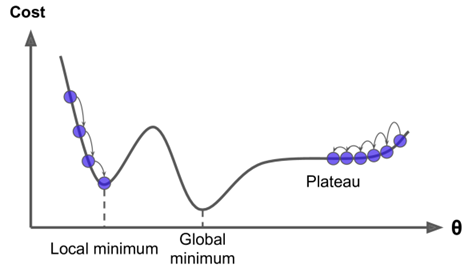

In the image we can see how the learning rate can impact the possibility of reaching either a local or global minima. If the learning rate is lower, it takes longer to run but is more precise in reaching a minimum, whereas a higher learning rate is too fast and skip this minima. This is representative by observing the output above, which shows that accuracy decreases as the learning increases. 

<h3>Plotting results</h3>

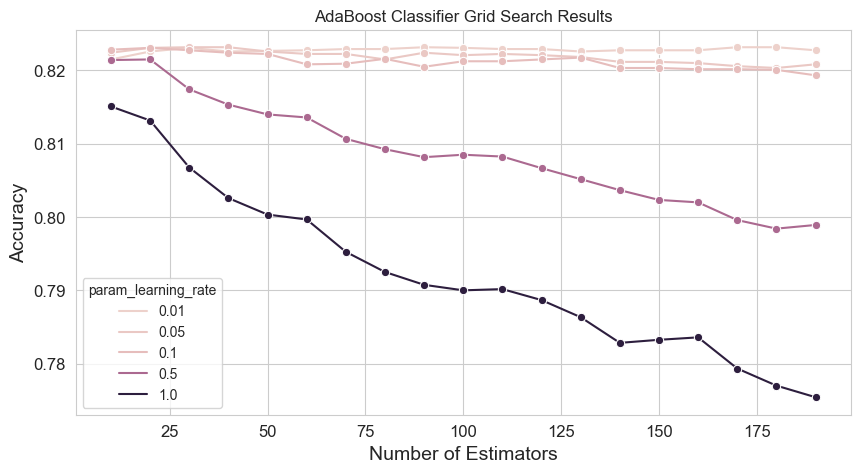

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.lineplot(data=cvres, x="param_n_estimators", y="mean_test_score", hue="param_learning_rate", marker='o')
plt.title("AdaBoost Classifier Grid Search Results")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.show()

<h4>Results</h4> 

This data visualisation reinforces the idea that a lower learning rate will yield a much higher accuracy compared to a higher learning rate. This is especially true when considering the number of estimators, which shows that a higher learning rate will decrease in accuracy as n_estimators increases. However, the fact that the the lower learning rates remain stagnant as n_estimators increases suggests that the model is underfitting on the trianing data. 

<h3>Random Forest</h3>

The final ensemble model in this classification task will be the random forest classifier algorithm. It works by combining the predictions made by multiple decision trees as an ensemble, generated based on the values of an independent set of random vectors, hence the name Random forest. Unlike AdaBoost, the probability distribution is fixed to generate these random vectors. The trees are fully grown without any pruning techniques in order to avoid any bias when constructing any ensuing decision tree. Once all trees have been contstructed, the predictions are determined by a majority vote.

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
scores=cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=5)
print('accuracy for 5 folds: ', scores)
print('mean: ', np.mean(scores))

accuracy for 5 folds:  [0.8125     0.81416667 0.82541667 0.81541667 0.81458333]
mean:  0.8164166666666667


In [12]:
rf.max_features= 2 
rf.n_estimators=500
scores=cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=5)
print('accuracy for 5 folds: ', scores)
print('mean: ', np.mean(scores))

accuracy for 5 folds:  [0.81041667 0.8175     0.81833333 0.81291667 0.81458333]
mean:  0.8147500000000001


<h3>Results</h3>

The initial model utilising default parameters achieved a mean accuracy of 81.6%, whereas the 2nd model in which max_features and n_estimators have been set to custom values achieved a lower accuracy of 81.4%, a small decrease in performance. GridSearch will be a necessity to find the optimal parameters.

In [13]:
param_grid = [
     {'max_features': [2, 3, 4, 6, 8, 10]} ]



grid_search = GridSearchCV(rf, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True, n_jobs=-1)  

grid_search.fit(X_train, y_train)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)

best parameter values {'max_features': 6}
best estimator RandomForestClassifier(max_features=6, n_estimators=500)
0.8162499999999999 {'max_features': 2}
0.817 {'max_features': 3}
0.8168333333333333 {'max_features': 4}
0.81775 {'max_features': 6}
0.8164999999999999 {'max_features': 8}
0.8164999999999999 {'max_features': 10}


In [16]:
grid_search.best_params_

{'max_features': 6}

<h3>Plotting results</h3>

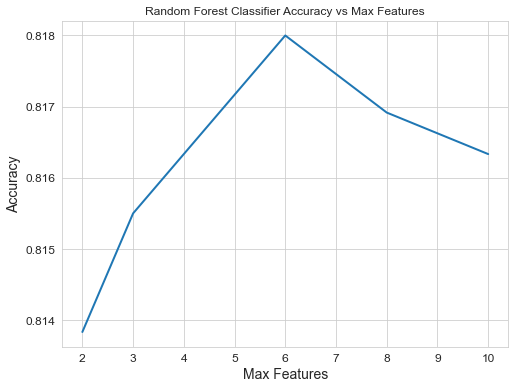

In [18]:
max_features_range = [2, 3, 4, 6, 8, 10]

accuracies = []
for f in max_features_range:
    rf = RandomForestClassifier(max_features=f)
    scores = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=5)
    accuracies.append(np.mean(scores))

# Plot the accuracies vs max_features
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
axis = sns.lineplot(x=max_features_range, y=accuracies, linewidth=2)
axis.set_xlabel('Max Features')
axis.set_ylabel('Accuracy')
axis.set_title('Random Forest Classifier Accuracy vs Max Features')
plt.show()

<h4>Results</h4>

Although a little irrespective of the GridSearch output, the graph shows that the model peaks at 6 max_features, with an accuracy of 81.77%. In this case, it's evident that the model is overfitting on the training data, which is inconsistent when considering the other models which usually underfit on the training data. Overfitting on the training data will lead to poor generalisation on unseen data, and so it will be more suitable to pick a stronger model.

<h3>Support Vector Machine</h3>

The 6th and final algorithm will be the Support Vector Machine (SVM), which is not an ensemble based algorithm like that of the three previous algorithms implemented. Before explaining how the model works, it's first important to understand the notion of a hyperplane in this context - A plane of dimension one less than the dimension of data space which divides the classes of data. The SVM works by finding this hyperplane to separate the two classes in such a way that it maximises the margin between them. The hyperplane serves as a decision boundary which separates data classes, and the margin is the distance between the hyperplane and the nearest data points of each class. 

The SVM algorithm works trying to maximise this margin, since decision boundaries with large margins tend to have better generalisation errors. Therefore, models with small margins are more susceptible to overfitting.

The algorithm can excel in finding a globalm minimum to reduce the cost function, which differs from other classification methods that operate on a greedy-based approach that tend to only find the local minimum. 

In [20]:
# Create an SVM model
from sklearn import svm
from sklearn.svm import SVC
sVM = SVC()
scores=cross_val_score(sVM, X_train, y_train, scoring='accuracy', cv=5)
print('accuracy for 5 folds: ', scores)
print('mean: ', np.mean(scores))

accuracy for 5 folds:  [0.77875    0.77875    0.77875    0.77833333 0.77833333]
mean:  0.7785833333333334


In [21]:
params = sVM.get_params() #Fetching parameters for SVM
print(params)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
sVM.C=5 #Adjusting the regularisation parameter
sVM.kernel = 'linear'
scores=cross_val_score(sVM, X_train, y_train, scoring='accuracy', cv=5)
print('accuracy for 5 folds: ', scores)
print('mean: ', np.mean(scores))

In [ ]:
param_grid = [
     {'C': [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]} ]

grid_search = GridSearchCV(sVM, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True,
                            n_jobs=-1)   # notice n_jobs is number of jobs to run in parallel; when -1, all the processor capacity is used

grid_search.fit(X_train, y_train)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

# display performances per each repetition of cross validation
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)

best parameter values {'C': 0.01}
best estimator SVC(C=0.01, gamma='auto')
0.7785833333333334 {'C': 0.01}
0.7785833333333334 {'C': 0.1}
0.7785833333333334 {'C': 0.2}
0.7785 {'C': 0.5}
0.7784166666666666 {'C': 0.8}
0.7785833333333333 {'C': 1}
0.7775833333333333 {'C': 5}
0.7769166666666667 {'C': 10}
0.7765833333333333 {'C': 20}
0.7764999999999999 {'C': 50}


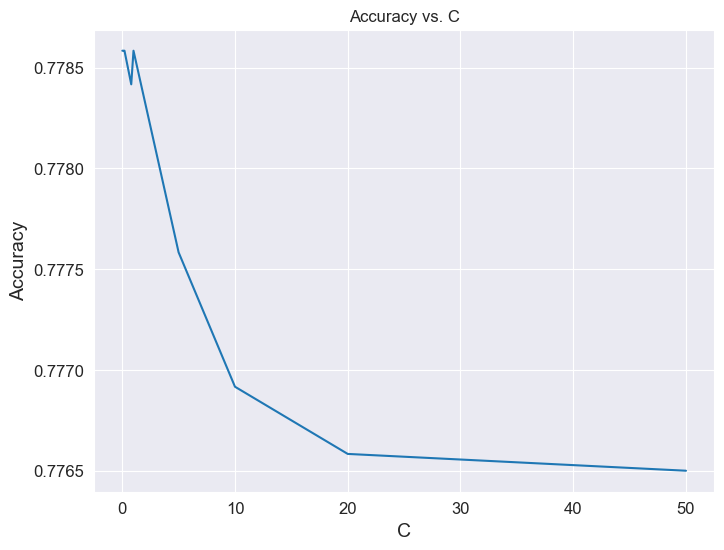

In [ ]:
param_grid = [{'C': [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]}]
sVM = SVC(kernel='rbf', gamma='auto')
grid_search = GridSearchCV(sVM, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
mean_scores = grid_search.cv_results_['mean_test_score']
C_values = [x['C'] for x in grid_search.cv_results_['params']]

# plot the mean test scores against C values
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.lineplot(x=C_values, y=mean_scores)
plt.title('Accuracy vs. C')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

<h4>Results</h4>

By observing the GridSearch output, it's evident that any optimisation parameter C beyond 1 produces considerably worse results. This can also been seen in the graph plot, which shows that there is a sizable drop in accuracy as C increases. As explained in the outset of the support vector machine section, the objective is to achieve a larger margin which leads to overall lower generalisation errors on training and testing on unseen data. Conversely, a larger regularisation parameter C leads to a smaller margin, which will in turn lead to a smaller margin and produce a worse trade-off variance. 

The model is overfitting as C increases, meaning that the decision boundary is too complex and is responding to the presence of noise in the training data. 

<h2>Using the best model to evaluate on the test set</h2>

All models have been constructed, and so the final step in this classification task is to use the best model on the test set, which is unseen data and provides a more realistic benchmark of the models' performance since the data is unseen. Up until now, we have evaluated on just the accuracy of each model. Since this is a classification task, it's also important to take into account other success measures such as precision, recall and the f1 score. 

To summarise:

Accuracy can be defined as - The rate of correction predictions made by the model.

Similarly, Precision is - The rate of correct positive predictions out of the all instances that are classified as positive.

Recall - Rate of detection of the positie class by the model.

F1 Rate - Harmonic mean of precision and recall. 


Out of all models, AdaBoost had the best results with the use of GridSearch and checking for the most optimal parameters. This was judged by evaluating all models' accuracy score on the 5 folds using cross validation, and then tuning hyperparameters followed by implementing GridSearchCV to find the most optimal parameters. In addition to the models' relative performance on the training data, the algorithm is also computationally inexpensive to run as an ensemble model, which typically outperforms single classification models, which is evident in this data mining analysis. This means that it will be efficient to run on future instances of data. The code below automatically selects the best parameters to be used by the AdaBoost model and then evaluates it on the test set. 

Below F1, accuracy, precision and recall scores are defined and printed using the test features and labels. A confusion matrix can also be seen below the test results, 


In [7]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

best_ab = grid_search.best_estimator_
y_pred = best_ab.predict(X_test)

f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Evaluation metrics
print("Evaluation metrics on the test set:")
print("F1 score:", f1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Evaluation metrics on the test set:
F1 score: 0.4303534303534304
Accuracy: 0.8173333333333334
Precision: 0.6877076411960132
Recall: 0.31316187594553707


In [8]:
from sklearn.metrics import confusion_matrix
#Counts of test records correctly and incorrectly tabulated in a table called a confusion matrix:
cm=confusion_matrix(y_test, y_pred) # confusion matrix
print('confusion matrix:  Actual Values on rows, predicted values on columns \n', cm)

confusion matrix:  Actual Values on rows, predicted values on columns 
 [[2245   94]
 [ 454  207]]


<h3>Confusion matrix inference</h3>

- True negatives can be seen on the first row/column
- False positives can bee seen on the First row/ Second column
- False negatives can be seen on the second row/first column
- True positives can been on the second row/second column

The confusion matrix shows that the model was able to correctly classify true negatives and true positives in a sufficient manner. However, the number of false positives is quite high, which is also respective of the test results.


<h2>Conclusion</h2>

Before beginning this classification task, we knew that this would be a difficult analysis to tackle, since neither of us have dealt with a dataset this large. Utilising 23 attribute variables to predict one variable was never going to be an easy task, but despite this, we are still satisfied with how the process went, which includes the data inspection/visualisation, data preprocessing, model building and evaluation. Overall, the final model didn't do as well as we expected, achieving a relatively low f1 score and recall, but the model is still able to perform relatively well on unseen data with its high accuracy and precision scores. 

The data mining algorithms we implemented were extremely complex to understand, and perhaps a better understanding of the models could have allowed for better optimisation of hyperparameters/model building. 

In hindsight, there were plenty of techniques that we didn't employ which could have boosted these scores but a significant margin. For example, our data preprocessing options could have explored instead of just simply splitting into the data into their respective feature and label sets, such as categorical encoding or removing variables with a low correlation.

Despite not achieving a score we hoped for, we were able to learn a plethora of lessons during this classification task analysis and will be able to apply this knowledge and experience in the future. 

<h2>References</h2>

- Tan, P.-N. et al. (2020) Introduction to data mining. NY, NY: Pearson. 

- Data mining labs/lectures